# Heart Disease Prediction | Kalp Hastalığı Tahmini


## Giriş | Introduction

Bu projede, bireylerin sağlık verilerine dayanarak kalp hastalığı riskini tahmin eden bir makine öğrenmesi modeli geliştirilmiştir. Amaç, veri analizi ve modelleme tekniklerini kullanarak kalp hastalığı varlığını öngörebilen bir sistem oluşturmaktır.

Proje, Kaggle Playground Series kapsamında sunulan sentetik bir sağlık veri seti kullanılarak gerçekleştirilmiştir. Süreç boyunca veri keşfi (EDA), model eğitimi ve Kaggle submission adımları uygulanmıştır.


## Veri Tanımı | Dataset Description

Veri seti, bireylerin çeşitli klinik ve fizyolojik özelliklerini içermektedir. Bu özellikler yaş, cinsiyet, kan basıncı, kolesterol seviyesi ve egzersizle ilişkili ölçümler gibi kalp sağlığıyla bağlantılı faktörleri kapsamaktadır.

Hedef değişken:

- **Heart Disease** → Kalp hastalığının varlığı (Presence / Absence)

Temel özellikler:

- Age → Yaş
- Sex → Cinsiyet
- Chest pain type → Göğüs ağrısı tipi
- BP → Kan basıncı
- Cholesterol → Kolesterol seviyesi
- Max HR → Maksimum kalp atış hızı
- Exercise angina → Egzersiz sırasında ağrı
- ST depression → ST segment değişimi

Bu veri seti, kalp hastalığı tahmini için sınıflandırma problemi olarak ele alınmaktadır.


## Proje Workflow | Project Workflow

1. Data Loading  
   Veri setinin yüklenmesi

2. Data Cleaning  
   Eksik ve hatalı değerlerin kontrolü

3. Exploratory Data Analysis (EDA)  
   Veri dağılımının ve ilişkilerin incelenmesi

4. Model Training  
   Sınıflandırma modelinin eğitilmesi

5. Prediction & Submission  
   Tahmin üretimi ve Kaggle submission


## Data Loading | Veri Yükleme

Bu adımda eğitim ve test veri setleri yüklenmektedir.


In [6]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


## Data Overview | Veri İncelemesi

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

## Exploratory Data Analysis | Keşifsel Veri Analizi

Bu aşamada veri setinin genel yapısı incelenmiş, sınıf dağılımı ve istatistiksel özellikler analiz edilmiştir. Amaç, modelleme öncesinde veri hakkında temel içgörü elde etmektir.

EDA sonuçları, veri setinin dengeli bir sınıflandırma problemi sunduğunu ve klinik değişkenler arasında anlamlı ilişkiler bulunduğunu göstermektedir.


### Temel İstatistikler | Basic Statistics

Bu adımda veri setinin sayısal özelliklerinin istatistiksel özeti incelenmektedir.



In [9]:
train.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


### Sınıf Dağılımı | Class Distribution

Hedef değişkenin dağılımı incelenerek veri dengesine bakılmıştır.


In [10]:
train["Heart Disease"].value_counts()

Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

### Sınıf Dağılımı Grafiği | Class Distribution Plot

Hedef değişkenin görsel dağılımı incelenmiştir.


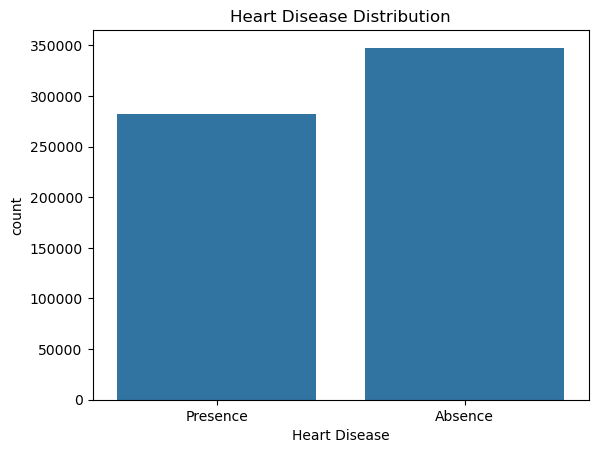

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Heart Disease", data=train)
plt.title("Heart Disease Distribution")
plt.show()


### Korelasyon Analizi | Correlation Analysis

Değişkenler arasındaki ilişkiler ısı haritası ile incelenmiştir.


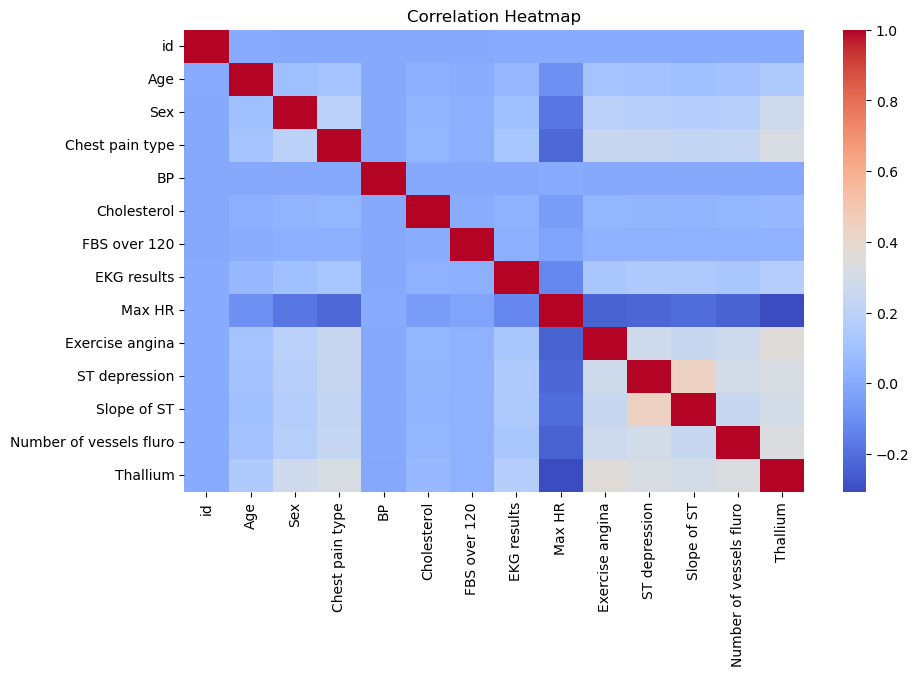

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Model Training | Model Eğitimi

Bu aşamada kalp hastalığını tahmin etmek için bir Decision Tree sınıflandırma modeli eğitilmiştir.


In [13]:
from sklearn.tree import DecisionTreeClassifier

X = train.drop(columns=["Heart Disease", "id"])
y = train["Heart Disease"]

model = DecisionTreeClassifier()
model.fit(X, y)

print("Model eğitildi ✔")


Model eğitildi ✔


### Prediction | Tahmin

Eğitilen model test verisi üzerinde tahmin üretmiştir.



In [14]:
pred = model.predict(test.drop(columns=["id"]))

### Kaggle Submission

Tahminler Kaggle submission formatına dönüştürülmüştür.


In [15]:
import numpy as np

pred = np.where(pred == "Presence", 1, 0)

submission = pd.read_csv("sample_submission.csv")
submission["Heart Disease"] = pred.astype(int)

submission.to_csv("submission.csv", index=False)

print("submission hazır 🎯")


submission hazır 🎯


## Conclusion | Sonuç

Bu projede kalp hastalığı tahmini için uçtan uca bir makine öğrenmesi pipeline’ı kurulmuştur. Veri analizi, model eğitimi ve Kaggle submission süreci başarıyla tamamlanmıştır.

Çalışma, veri bilimi projelerinde EDA, modelleme ve deployment süreçlerinin birlikte yürütülmesinin önemini göstermektedir.


### Model Saving | Model Kaydetme


In [16]:
import joblib

joblib.dump(model, "heart_model.pkl")
print("Model kaydedildi ✔")


Model kaydedildi ✔
